In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('NEW-DATA-1.T15.txt')

In [3]:
df

1:Date 2:Time  3:Temperature_Comedor_Sensor  \
0     13/03/2012  11:45                       18.1875   
1     13/03/2012  12:00                       18.4633   
2     13/03/2012  12:15                       18.7673   
3     13/03/2012  12:30                       19.0727   
4     13/03/2012  12:45                       19.3721   
...          ...    ...                           ...   
2759  11/04/2012  05:30                       21.1520   
2760  11/04/2012  05:45                       21.0413   
2761  11/04/2012  06:00                       20.9347   
2762  11/04/2012  06:15                       20.8560   
2763  11/04/2012  06:30                       20.7627   

      4:Temperature_Habitacion_Sensor  5:Weather_Temperature  \
0                             17.8275                 0.0000   
1                             18.1207                 6.8000   
2                             18.4367                17.0000   
3                             18.7513                18.0000   
4                             19.0414                20.0000   
...                               ...                    ...   
2759                          20.8187                13.0000   
2760                          20.7053                12.1333   
2761                          20.5827                12.0000   
2762                          20.5200                12.0000   
2763                          20.4400                12.1333   

      6:CO2_Comedor_Sensor  7:CO2_Habitacion_Sensor  8:Humedad_Comedor_Sensor  \
0                  216.560                  221.920                   39.9125   
1                  219.947                  220.363                   39.9267   
2                  219.403                  218.933                   39.7720   
3                  218.613                  217.045                   39.7760   
4                  217.714                  216.080                   39.7757   
...                    ...                      ...                       ...   
2759               190.539                  192.181                   41.3120   
2760               190.421                  193.067                   41.3173   
2761               190.432                  193.653                   41.3333   
2762               191.531                  193.387                   41.3093   
2763               191.563                  193.664                   41.2800   

      9:Humedad_Habitacion_Sensor  10:Lighting_Comedor_Sensor  ...  \
0                         42.4150                     81.6650  ...   
1                         42.2453                     81.7413  ...   
2                         42.2267                     81.4240  ...   
3                         42.0987                     81.5013  ...   
4                         42.0686                     81.4657  ...   
...                           ...                         ...  ...   
2759                      41.6880                     11.4427  ...   
2760                      41.7200                     11.6867  ...   
2761                      41.7573                     19.5387  ...   
2762                      41.8107                     20.9853  ...   
2763                      41.8373                     20.5620  ...   

      15:Meteo_Exterior_Sol_Oest  16:Meteo_Exterior_Sol_Est  \
0                        9690.24                   12604.20   
1                       11022.00                   10787.20   
2                       13960.50                    9669.63   
3                       18511.20                    9648.13   
4                       26349.00                    9208.32   
...                          ...                        ...   
2759                        0.00                       0.00   
2760                      465.92                    2716.67   
2761                     3454.98                   16203.80   
2762                     6795.26                   38303.10   
2763                     8952.83                 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   1:Date                           2764 non-null   object 
 1   2:Time                           2764 non-null   object 
 2   3:Temperature_Comedor_Sensor     2764 non-null   float64
 3   4:Temperature_Habitacion_Sensor  2764 non-null   float64
 4   5:Weather_Temperature            2764 non-null   float64
 5   6:CO2_Comedor_Sensor             2764 non-null   float64
 6   7:CO2_Habitacion_Sensor          2764 non-null   float64
 7   8:Humedad_Comedor_Sensor         2764 non-null   float64
 8   9:Humedad_Habitacion_Sensor      2764 non-null   float64
 9   10:Lighting_Comedor_Sensor       2764 non-null   float64
 10  11:Lighting_Habitacion_Sensor    2764 non-null   float64
 11  12:Precipitacion                 2764 non-null   float64
 12  13:Meteo_Exterior_Cr

In [5]:
df.describe()

3:Temperature_Comedor_Sensor  4:Temperature_Habitacion_Sensor  \
count                   2764.000000                      2764.000000   
mean                      19.199722                        18.824852   
std                        2.853315                         2.821178   
min                       11.352000                        11.076000   
25%                       17.450800                        17.060350   
50%                       19.373650                        19.021000   
75%                       21.229975                        20.828700   
max                       25.540000                        24.944000   

       5:Weather_Temperature  6:CO2_Comedor_Sensor  7:CO2_Habitacion_Sensor  \
count            2764.000000           2764.000000              2764.000000   
mean               13.897396            208.479123               211.065844   
std                 4.171991             27.032686                28.469144   
min                 0.000000            187.339000               188.907000   
25%                10.783325            200.893250               202.682750   
50%                15.000000            207.045500               209.408000   
75%                16.666700            211.245500               213.218750   
max                26.000000            594.389000               609.237000   

       8:Humedad_Comedor_Sensor  9:Humedad_Habitacion_Sensor  \
count               2764.000000                  2764.000000   
mean                  44.878420                    47.321220   
std                    6.587440                     7.557795   
min                   27.084000                    29.594700   
25%                   40.351975                    42.531325   
50%                   45.434650                    47.534700   
75%                   49.352675                    52.685975   
max                   60.957300                    62.594700   

       10:Lighting_Comedor_Sensor  11:Lighting_Habitacion_Sensor  \
count                 2764.000000                    2764.000000   
mean                    26.745381                      40.732571   
std                     23.298441                      42.326087   
min                     10.740000                      11.328000   
25%                     11.588700                      13.265300   
50%                     11.801300                      17.690000   
75%                     31.224000                      52.057350   
max                    110.693000                     162.965000   

       12:Precipitacion  ...  15:Meteo_Exterior_Sol_Oest  \
count       2764.000000  ...                 2764.000000   
mean           0.047033  ...                14936.617682   
std            0.206705  ...                25964.049455   
min            0.000000  ...                    0.000000   
25%            0.000000  ...                    0.000000   
50%            0.000000  ...                    0.000000   
75%            0.000000  ...                15088.000000   
max            1.000000  ...                95278.400000   

       16:Meteo_Exterior_Sol_Est  17:Meteo_Exterior_Sol_Sud  \
count                2764.000000                2764.000000   
mean                12248.000148               22047.525813   
std                 21758.550527               32709.387051   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                 11131.275000               38736.575000   
max                 85535.400000               95704.400000   

       18:Meteo_Exterior_Piranometro  19:Exterior_Entalpic_1  \
count                    2764.000000                  2764.0   
mean                      215.010017                     0.0   
std                       297.234046                     0.0   
min                        -4.164670                     0.0   
25%                        

In [6]:
df.columns

Index(['1:Date', '2:Time', '3:Temperature_Comedor_Sensor',
       '4:Temperature_Habitacion_Sensor', '5:Weather_Temperature',
       '6:CO2_Comedor_Sensor', '7:CO2_Habitacion_Sensor',
       '8:Humedad_Comedor_Sensor', '9:Humedad_Habitacion_Sensor',
       '10:Lighting_Comedor_Sensor', '11:Lighting_Habitacion_Sensor',
       '12:Precipitacion', '13:Meteo_Exterior_Crepusculo',
       '14:Meteo_Exterior_Viento', '15:Meteo_Exterior_Sol_Oest',
       '16:Meteo_Exterior_Sol_Est', '17:Meteo_Exterior_Sol_Sud',
       '18:Meteo_Exterior_Piranometro', '19:Exterior_Entalpic_1',
       '20:Exterior_Entalpic_2', '21:Exterior_Entalpic_turbo',
       '22:Temperature_Exterior_Sensor', '23:Humedad_Exterior_Sensor',
       '24:Day_Of_Week'],
      dtype='object')

In [7]:
df = df.drop(['1:Date', '2:Time','19:Exterior_Entalpic_1','20:Exterior_Entalpic_2', '21:Exterior_Entalpic_turbo'], axis = 1)

In [8]:
df

3:Temperature_Comedor_Sensor  4:Temperature_Habitacion_Sensor  \
0                          18.1875                          17.8275   
1                          18.4633                          18.1207   
2                          18.7673                          18.4367   
3                          19.0727                          18.7513   
4                          19.3721                          19.0414   
...                            ...                              ...   
2759                       21.1520                          20.8187   
2760                       21.0413                          20.7053   
2761                       20.9347                          20.5827   
2762                       20.8560                          20.5200   
2763                       20.7627                          20.4400   

      5:Weather_Temperature  6:CO2_Comedor_Sensor  7:CO2_Habitacion_Sensor  \
0                    0.0000               216.560                  221.920   
1                    6.8000               219.947                  220.363   
2                   17.0000               219.403                  218.933   
3                   18.0000               218.613                  217.045   
4                   20.0000               217.714                  216.080   
...                     ...                   ...                      ...   
2759                13.0000               190.539                  192.181   
2760                12.1333               190.421                  193.067   
2761                12.0000               190.432                  193.653   
2762                12.0000               191.531                  193.387   
2763                12.1333               191.563                  193.664   

      8:Humedad_Comedor_Sensor  9:Humedad_Habitacion_Sensor  \
0                      39.9125                      42.4150   
1                      39.9267                      42.2453   
2                      39.7720                      42.2267   
3                      39.7760                      42.0987   
4                      39.7757                      42.0686   
...                        ...                          ...   
2759                   41.3120                      41.6880   
2760                   41.3173                      41.7200   
2761                   41.3333                      41.7573   
2762                   41.3093                      41.8107   
2763                   41.2800                      41.8373   

      10:Lighting_Comedor_Sensor  11:Lighting_Habitacion_Sensor  \
0                        81.6650                       113.5200   
1                        81.7413                       113.6050   
2                        81.4240                       113.6000   
3                        81.5013                       113.3440   
4                        81.4657                       113.0340   
...                          ...                            ...   
2759                     11.4427                        12.9400   
2760                     11.6867                        19.3200   
2761                     19.5387                        23.2427   
2762                     20.9853                        23.4400   
2763                     20.5620                        22.3080   

      12:Precipitacion  13:Meteo_Exterior_Crepusculo  \
0                  0.0                       623.360   
1                  0.0                       623.211   
2                  0.0                       622.656   
3                  0.0                       622.571   
4                  0.0                       622.400   
...                ...                           ...   
2759               0.0                       392.603   
2760               0.0                       613.120   
2761               0.0                       613.803   
2762               0.0                       615.403   
2763               0.0                

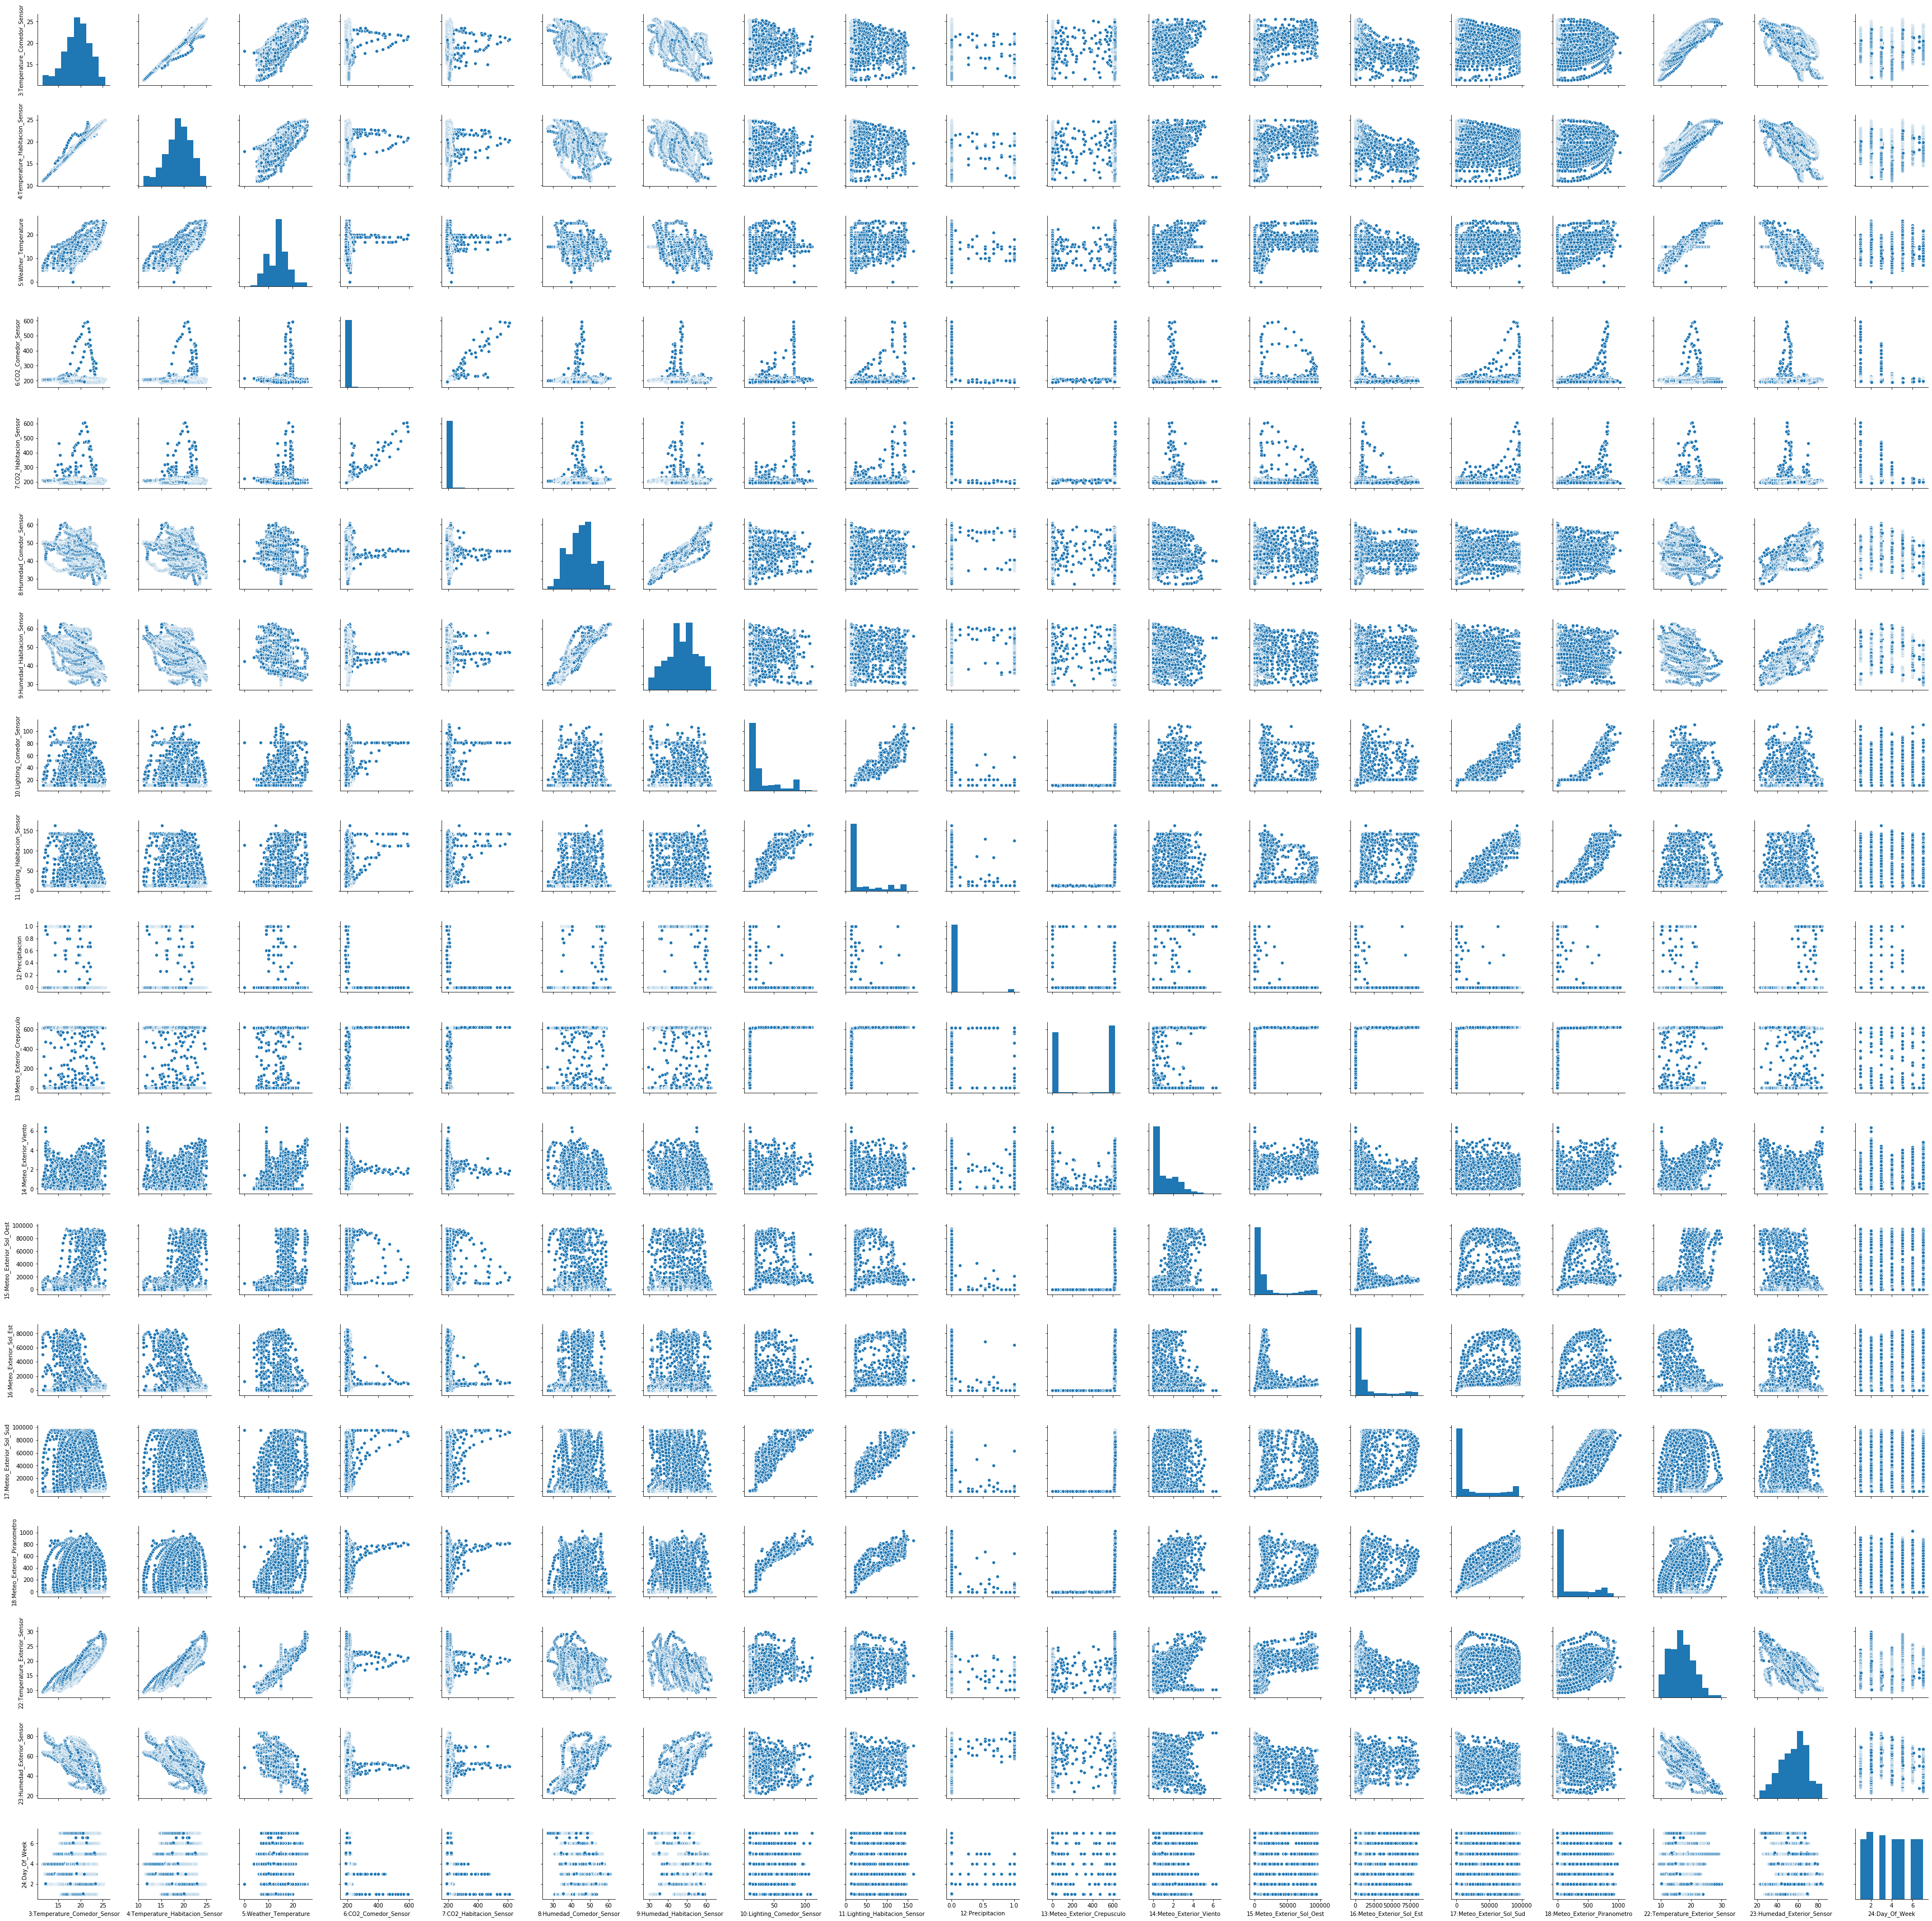

In [9]:
sns.pairplot(df)

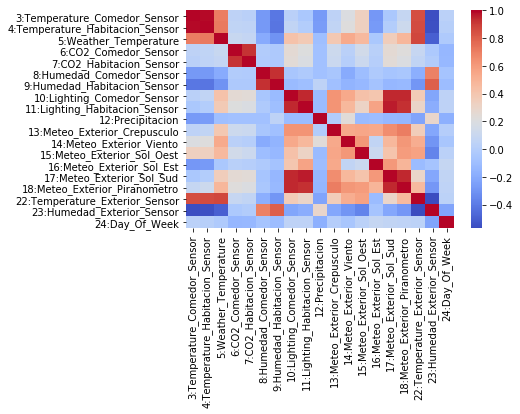

In [10]:

sns.heatmap(df.corr(),cmap='coolwarm')


In [12]:
X = df.drop(['24:Day_Of_Week'],axis=1)

In [13]:
y = df['24:Day_Of_Week']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
lm = LinearRegression()

In [16]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
lm.coef_

array([ 3.93741239e-01, -5.17296327e-01, -9.32903023e-02, -1.77274675e-02,
        4.91657335e-03,  4.38308777e-02,  2.51336846e-02,  9.35746236e-03,
        1.72159236e-03,  9.21382605e-02, -3.64554167e-04, -2.30400859e-01,
        8.86659563e-06, -2.79651819e-06,  3.07732279e-05, -3.64645753e-03,
        1.10036379e-01, -7.64796004e-02])

In [18]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

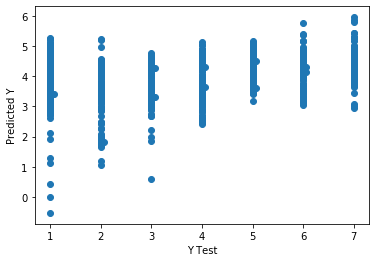

In [19]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [20]:
from sklearn import metrics
print('MAE: ',metrics.mean_absolute_error(y_test,predictions))
print('MSE: ',metrics.mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  1.5398800021376504
MSE:  3.435459368440759
RMSE:  1.8534992226706648


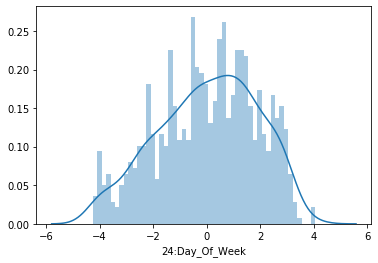

In [21]:
sns.distplot(y_test-predictions,bins=50)

In [23]:
model = LinearRegression()

In [28]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('traning:',model.score(X_train,y_train))
print('testing:',model.score(X_test,y_test))

traning: 0.16462971036586294
testing: 0.1355798489492458
